In [185]:
import sys 
import os
from itertools import groupby
from math import floor
print(os. getcwd() )
import numpy as np
import scipy.sparse as sp 
from scipy.sparse import coo_matrix

/Users/maosheng/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/build_SC


In [186]:
from collections import OrderedDict

def generate_simplices(top_dim=7, file_path='./ScHoLP-Data-1.0/', file_name='email-Enron',unique_simplices=False,percentage_time=1):
    '''
    top_dim: the largest simplicial order, i.e., the simplicial complex order
    file_name: 
    unique_simplices: if to generate the unique simplices, since this dataset contains the same simplex for many times over a certain length of time stamps
        - 'True': we also include the duration of the time stamps of each simplex in the dict value
        - 'False': generate simplices allowed to be duplicate        
    '''
    file_path = file_path +file_name
    with open(file_path+'/'+file_name+'-nverts.txt') as f:
        simplex_dim = [line.rstrip('\n') for line in f]    
    with open(file_path+'/'+file_name+'-simplices.txt') as f:
        simplex_vertices = [line.rstrip('\n') for line in f]
    top_dim = top_dim+1
    simplex_dim = simplex_dim[:floor(percentage_time*len(simplex_dim))]
    start=0
    simplex_vertices_tupled = []
    for count in simplex_dim:
        end = start + int(count) 
        simplex_set = simplex_vertices[start:end]
        simplex_set = {int(x) for x in simplex_set}
        simplex_vertices_tupled.append(simplex_set)
        start=end
    
    list_simplices = [None]*top_dim
    cochains = [None]*top_dim
    for k in range(top_dim):
        list_simplices[k] = [(sorted(id_vertices)) for id_simp,id_vertices in enumerate(simplex_vertices_tupled) if len(id_vertices) == k+1]
        list_simplices[k].sort() 
        freq_simplices = [len(list(group)) for key, group in groupby(list_simplices[k])]
        if unique_simplices:
            # list_simplices[k]=[list(x) for x in set(tuple(x) for x in list_simplices[k])]
            sorted_list = list_simplices[k].copy() 
            sorted_list = sorted(sorted_list)
            sorted_list = [frozenset(l) for l in sorted_list]
            unique_sets = list(OrderedDict.fromkeys(map(frozenset, sorted_list)).keys())
            '''list_simplices[k]:{'key':idx,'value':{v0,v1,...,v_k},...}'''
            list_simplices[k] = dict(zip(unique_sets,range(len(list_simplices[k]))))
            cochains[k] = dict(zip(unique_sets,freq_simplices))
            
        else:
            sorted_list = list_simplices[k].copy() 
            sorted_list = sorted(sorted_list,key=tuple)   
            sorted_list = [frozenset(l) for l in sorted_list]
            list_simplices[k] = dict(zip(sorted_list,range(len(list_simplices[k]))))
    
    return list_simplices,cochains


In [198]:
file_path = './ScHoLP-Data-1.0/'
file_name = 'email-Enron'#'tags-stack-overflow'#'email-Enron'#'contact-high-school'##
list_simp,cochains_dic = generate_simplices(top_dim=5,file_path=file_path,file_name=file_name,unique_simplices=True,percentage_time=1)


In [202]:
print(len(cochains_dic[2]))
print(list_simp[0])
# print(cochains_dic[0])

317
{frozenset({2}): 0, frozenset({3}): 1, frozenset({6}): 2, frozenset({8}): 3, frozenset({12}): 4, frozenset({13}): 5, frozenset({15}): 6, frozenset({17}): 7, frozenset({19}): 8, frozenset({20}): 9, frozenset({21}): 10, frozenset({23}): 11, frozenset({29}): 12, frozenset({30}): 13, frozenset({33}): 14, frozenset({37}): 15, frozenset({41}): 16, frozenset({42}): 17, frozenset({43}): 18, frozenset({44}): 19, frozenset({46}): 20, frozenset({47}): 21, frozenset({55}): 22, frozenset({56}): 23, frozenset({57}): 24, frozenset({61}): 25, frozenset({62}): 26, frozenset({63}): 27, frozenset({65}): 28, frozenset({68}): 29, frozenset({70}): 30, frozenset({73}): 31, frozenset({74}): 32, frozenset({77}): 33, frozenset({83}): 34, frozenset({86}): 35, frozenset({90}): 36, frozenset({95}): 37, frozenset({96}): 38, frozenset({102}): 39, frozenset({104}): 40, frozenset({108}): 41, frozenset({110}): 42, frozenset({111}): 43, frozenset({112}): 44, frozenset({114}): 45, frozenset({115}): 46, frozenset({120

In [189]:
'''add the missed ndoes in the list based on edge list'''
def fix_nodes(list_simplices,cochains):
    list_nodes, idx_nodes = [],[]
    freq_nodes = []
    for simplex, idx_simplex in list_simplices[1].items():
        for i, node in enumerate(np.sort(list(simplex))):
            list_nodes.append(node)
        
    list_nodes = (list(set(list_nodes)))
    list_nodes = [frozenset([l]) for l in list_nodes]
    freq_nodes = [0]*len(list_nodes)
    freq_nodes = [cochains[0][l] if l in cochains[0] else 0 for l in list_nodes]
    list_simplices[0] = dict(zip(list_nodes,range(len(list_nodes))))
    cochains[0] = dict(zip(list_nodes,freq_nodes)) 
        
    return list_simplices,cochains

In [204]:
list_simp,cochains_dic = fix_nodes(list_simp,cochains_dic)
print(len(cochains_dic[1]))
print((list_simp[0]))
# print(list_simp[1])
# print(cochains_dic[1])

809
{frozenset({1}): 0, frozenset({2}): 1, frozenset({3}): 2, frozenset({4}): 3, frozenset({5}): 4, frozenset({6}): 5, frozenset({7}): 6, frozenset({8}): 7, frozenset({9}): 8, frozenset({11}): 9, frozenset({12}): 10, frozenset({13}): 11, frozenset({14}): 12, frozenset({15}): 13, frozenset({17}): 14, frozenset({18}): 15, frozenset({19}): 16, frozenset({20}): 17, frozenset({21}): 18, frozenset({22}): 19, frozenset({23}): 20, frozenset({24}): 21, frozenset({25}): 22, frozenset({26}): 23, frozenset({27}): 24, frozenset({28}): 25, frozenset({29}): 26, frozenset({30}): 27, frozenset({32}): 28, frozenset({33}): 29, frozenset({34}): 30, frozenset({36}): 31, frozenset({37}): 32, frozenset({38}): 33, frozenset({39}): 34, frozenset({40}): 35, frozenset({41}): 36, frozenset({42}): 37, frozenset({43}): 38, frozenset({44}): 39, frozenset({45}): 40, frozenset({46}): 41, frozenset({47}): 42, frozenset({48}): 43, frozenset({50}): 44, frozenset({51}): 45, frozenset({52}): 46, frozenset({53}): 47, frozen

In [191]:

def get_incidence_matrix(simplices):
    boundaries = list()
    for d in range(1, len(simplices)):
        # print(d)
        idx_simplices, idx_faces, values = [], [], []
        for simplex, idx_simplex in simplices[d].items():
            for i, left_out in enumerate(np.sort(list(simplex))):
                face = simplex.difference({left_out})
                if face in simplices[d-1]:
                    idx_simplices.append(idx_simplex)
                    values.append((-1)**i)
                    # print(idx_simplex,left_out,face)
                    idx_faces.append(simplices[d-1][face]) 
        # assert len(values) == (d+1) * len(simplices[d])
        boundary = coo_matrix((values, (idx_faces, idx_simplices)),
                                     dtype=np.float32,
                                     shape=(len(simplices[d-1]), len(simplices[d])))
        boundaries.append(boundary)
    return boundaries


In [207]:
boundaries = get_incidence_matrix(list_simp)
b1,b2,b3,b4 = boundaries[0],boundaries[1],boundaries[2],boundaries[3]
# np.save(file_path+file_name+'/'+file_name+'_cochains_all.npy', cochains_dic)
# np.save(file_path+file_name+'/'+file_name+'_boundaries_all.npy', boundaries)
print(b1.shape,b2.shape,b3.shape,b4.shape)

tri_pos_neg_idx = [b2.getcol(j).nnz==3 for j in range(b2.shape[1])]
# print(tri_pos_neg_idx)
b2_pos = b2.toarray()[:,tri_pos_neg_idx]
print(b2)
# print(b2_pos.shape)
# print(np.nonzero(b1@b2))
# print(np.count_nonzero(b1@b2_pos))
# print(cochains_dic[2])


(142, 809) (809, 317) (317, 138) (138, 63)
  (64, 0)	1.0
  (6, 0)	-1.0
  (1, 0)	1.0
  (198, 1)	1.0
  (3, 1)	1.0
  (220, 2)	1.0
  (15, 2)	-1.0
  (4, 2)	1.0
  (232, 3)	1.0
  (27, 3)	-1.0
  (4, 3)	1.0
  (283, 4)	1.0
  (6, 4)	-1.0
  (5, 4)	1.0
  (22, 5)	-1.0
  (5, 5)	1.0
  (365, 6)	1.0
  (7, 6)	-1.0
  (6, 6)	1.0
  (369, 7)	1.0
  (10, 7)	-1.0
  (6, 7)	1.0
  (371, 8)	1.0
  (12, 8)	-1.0
  (6, 8)	1.0
  :	:
  (704, 306)	1.0
  (741, 307)	1.0
  (713, 307)	1.0
  (713, 308)	1.0
  (756, 309)	1.0
  (745, 309)	-1.0
  (741, 309)	1.0
  (771, 310)	1.0
  (745, 310)	-1.0
  (742, 310)	1.0
  (758, 311)	1.0
  (747, 311)	-1.0
  (771, 312)	1.0
  (756, 312)	-1.0
  (754, 312)	1.0
  (755, 313)	-1.0
  (799, 314)	1.0
  (760, 314)	-1.0
  (759, 314)	1.0
  (804, 315)	1.0
  (773, 315)	-1.0
  (772, 315)	1.0
  (802, 316)	1.0
  (792, 316)	-1.0
  (791, 316)	1.0


In [193]:
def build_boundaries_positive_simplices(boundaries,cochains_dic):
    boundaries_pos_simplices = []
    cochains_dic =[np.array(list(cochains_dic[i].values())) for i in range(len(cochains_dic))]
    boundaries = [boundaries[k].toarray() for k in range(len(boundaries))]
    cochains = []
    cochains.append(cochains_dic[0])
    for k in range(len(boundaries)-1):
        bk = boundaries[k]
        pos_neg_idx = [np.count_nonzero(bk[:,j])==k+2 for j in range(bk.shape[1])]
        bk_pos = bk[:,pos_neg_idx]
        boundaries[k+1] = boundaries[k+1][pos_neg_idx,:]
        boundaries_pos_simplices.append(bk_pos)
        cochains.append(cochains_dic[k+1][pos_neg_idx])
        
    assert [np.count_nonzero(boundaries_pos_simplices[k]@boundaries_pos_simplices[k+1]) == 0 for k in range(len(boundaries_pos_simplices)-1)]
    boundaries_pos_simplices = [coo_matrix(boundaries_pos_simplices[k]) for k in range(len(boundaries_pos_simplices)) ]
    return boundaries_pos_simplices,cochains

In [208]:
# print(cochains_dic[2])
boundaries_pos,cochains = build_boundaries_positive_simplices(boundaries,cochains_dic)
print([boundaries_pos[k].shape for k in range(len(boundaries_pos))])
b1,b2,b3,b4 = boundaries_pos[0],boundaries_pos[1],boundaries_pos[2],boundaries_pos[3]
edge_idx = np.reshape(np.nonzero(b2.T)[1],(-1,3)) 
node_idx = np.reshape(np.nonzero(b1.T)[1],(-1,2))
np.save(file_path+file_name+'/'+file_name+'_cochains.npy', cochains)
np.save(file_path+file_name+'/'+file_name+'_boundaries.npy', boundaries_pos)
# print(len(np.where(cochains[2]>1)[0]))
# print(cochains[2])
# np.savetxt(file_path+file_name+'/'+file_name+'_cochains'+str(0)+'.txt', cochains[0],delimiter=',',fmt='%.2f')
# np.savetxt(file_path+file_name+'/'+file_name+'_cochains'+str(1)+'.txt', cochains[1],delimiter=',',fmt='%.2f')
# np.savetxt(file_path+file_name+'/'+file_name+'_cochains'+str(2)+'.txt', cochains[2],delimiter=',',fmt='%.2f')

[(142, 809), (809, 191), (191, 7), (7, 0)]


/usr/local/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


nan


/var/folders/5z/fws8dk9s1fj2b4thgg65kc0w0000gn/T/ipykernel_54612/2109568865.py:19: RuntimeWarning: invalid value encountered in double_scalars
  rayleigh1 /= cochains[dim].T @ cochains[dim]
/var/folders/5z/fws8dk9s1fj2b4thgg65kc0w0000gn/T/ipykernel_54612/2109568865.py:20: RuntimeWarning: invalid value encountered in true_divide
  fourier1 = eigenvectors.T @ (cochains[dim] / np.linalg.norm(cochains[dim], axis=0))
/var/folders/5z/fws8dk9s1fj2b4thgg65kc0w0000gn/T/ipykernel_54612/2109568865.py:19: RuntimeWarning: invalid value encountered in double_scalars
  rayleigh1 /= cochains[dim].T @ cochains[dim]


9.442922374429223
nan


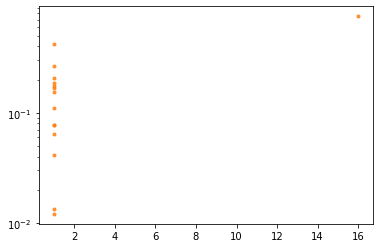

In [195]:
def build_laplacians(boundaries):
    laplacians = list()
    up = coo_matrix(boundaries[0] @ boundaries[0].T)
    laplacians.append(up)
    for d in range(len(boundaries)-1):
        down = boundaries[d].T @ boundaries[d]
        up = boundaries[d+1] @ boundaries[d+1].T
        laplacians.append(coo_matrix(down + up))
    down = boundaries[-1].T @ boundaries[-1]
    laplacians.append(coo_matrix(down))
    return laplacians

import matplotlib.pyplot as plt
laplacians = build_laplacians(boundaries_pos)
# measure the signal variation 
for dim in range(3):
    eigenvalues, eigenvectors = np.linalg.eigh(laplacians[dim].toarray())
    rayleigh1 = cochains[dim].T @ laplacians[dim] @ cochains[dim]
    rayleigh1 /= cochains[dim].T @ cochains[dim]
    fourier1 = eigenvectors.T @ (cochains[dim] / np.linalg.norm(cochains[dim], axis=0))
    print(rayleigh1)
    plt.semilogy(eigenvalues[:], np.abs(fourier1)[:], '.', alpha=0.8)

In [196]:
print(abs(b1).toarray().sum(axis=1))

[15.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
